# Aufgabe 29 - Entfaltung mit quadratischen Matrizen

## Teilaufgabe a)
DIe Matrix beschreibt einen Messprozess, in welchem die Daten $n$ verschiedenen Bins zugeordnet werden können und Fehlklassifikation nur zu nächsten Nachbarn hin stattfinden können. Dies geschieht mit Wahrscheinlichkeit $\epsilon$.

In [1]:
import numpy as np
from scipy.sparse import diags # to easily make a tridiagonal matrix
import matplotlib.pyplot as plt

In [2]:
def getResponseMatrix(n, epsilon):
    A = 1-2*epsilon*np.ones(n)
    A[0] = A[n-1] = 1-epsilon
    diagonals = [A, epsilon*np.ones(n-1), epsilon*np.ones(n-1)]
    A = diags(diagonals, [0, 1, -1]).toarray() # 0,1,-1 means place the subarrays of diagonals
    # in the main diag and the two sub diags
    return A

## Teilaufgabe b)

In [3]:
n = 20
epsilon = 0.23
A = getResponseMatrix(n, epsilon)
f = np.array([193,485,664,763,804,805,779,736,684,626,
              566,508,452,400,351,308,268,233,202,173])
g = np.dot(A,f)
prng = np.random.RandomState(0) # Das ist zur Reproduzierbarkeit!
gmess = prng.poisson(g, np.size(g)) # Ziehe np.size(g) poissonverteilte Zufallszahlen mit lambda=g
print('Die gemessenen g sind bei uns dann',gmess)

Die gemessenen g sind bei uns dann [262 465 640 745 873 825 780 684 705 623 534 510 438 398 358 346 262 243
 209 167]


## Teilaufgabe c)
Die Faltungsgleichung $\mathbf{g} = \mathbf{A} \, \mathbf{f}$ lautet mit $\mathbf{A} = \mathbf{U} \, \mathbf{D} \, \mathbf{U}^{-1}$ dann
\begin{equation}
    \mathbf{g} = \mathbf{U} \, \mathbf{D} \, \mathbf{U}^{-1} \mathbf{f} \iff \mathbf{c} = \mathbf{D} \mathbf{b}
\end{equation}
mit $\mathbf{c} = \mathbf{U}^{-1} \mathbf{g}$ und $\mathbf{b} = \mathbf{U}^{-1} \mathbf{f}$.

In [4]:
w, U = np.linalg.eig(A) # w are the eigenvalues, U is a matrix of eigenvectors
index = w.argsort()[::-1]
w = w[index]
U = U[:,index]
Uinv = np.linalg.inv(U)
D = np.diag(w)
# Nun sind die EW sortiert und die EV in der Matrix U auch.

## Teilaufgabe d)

In [5]:
b = Uinv@f
c = Uinv@g

In [6]:
Vb = Uinv@np.diag(f)@Uinv.T # Nimm an, dass die f aus Poissonverteilungen stammen.
print(Vb)

[[ 500.          151.31248946 -109.29259123  -74.5318382    61.50464599
   -37.79343197   31.3283139   -20.63676695  -17.90899736  -12.2600234
    11.1           7.94313819    7.24981184   -5.0060538     4.66192869
    -3.17907219    2.88297826   -1.82312504    1.22379398    0.65076887]
 [ 151.31248946  422.71846761   54.29211917 -120.77188464   79.42596024
   -65.64281546   41.31638988  -34.81603668  -23.26154354  -20.51245875
    14.28579256   12.97527638    9.15646146   -8.42287251    5.7877581
    -5.33505487    3.53708759   -2.9039265     1.74930716    0.86535302]
 [-109.29259123   54.29211917  456.50964775   80.27009535   99.43399559
   -67.29436606   56.15392573  -35.39313771  -30.00134848  -20.20904473
    17.78996459   12.20896027   11.14536666   -7.86459038    7.16496459
    -4.82895867    4.16183442   -2.70810659    2.03857348    0.828981  ]
 [ -74.5318382  -120.77188464   80.27009535  477.84753679  -92.40168952
   -89.94510587   61.37111389  -51.33923753  -32.34063891  -27.

[-2251.04963295  -690.91922954   466.52623091   342.23670464
  -329.3666805    179.20573364  -160.66734023    77.26719097
    17.4191047     -2.55736399   -34.36919299   -78.49226697
  -157.473201     -10.5043462    -28.13801846    80.73244377
  -110.35416432   -21.61573022   464.69860952   124.47914325]
[ 0.82265836  0.81943559  0.60348994  0.31600601  0.21950279  0.14236117
  0.13625065  0.03071633 -0.00450958 -0.01852305 -0.03811653 -0.04961774
 -0.0606056  -0.13841091 -0.19459522 -0.27768352 -0.28331597 -0.58079532
 -1.21834624 -3.96943339]


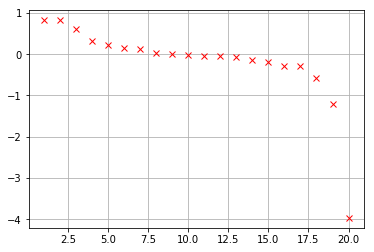

In [8]:
b = np.linalg.inv(D) @ Uinv @ gmess
print(b)
index = b.argsort()[::-1]
b = b[index]
b = b/np.std(b, ddof=1)
print(b)
plt.plot(np.linspace(1, np.size(b), np.size(b)),b, 'rx')
plt.grid()
plt.show()